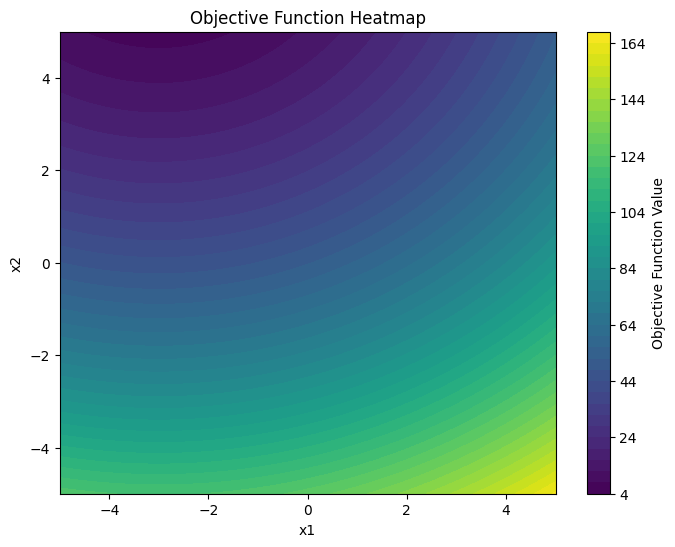

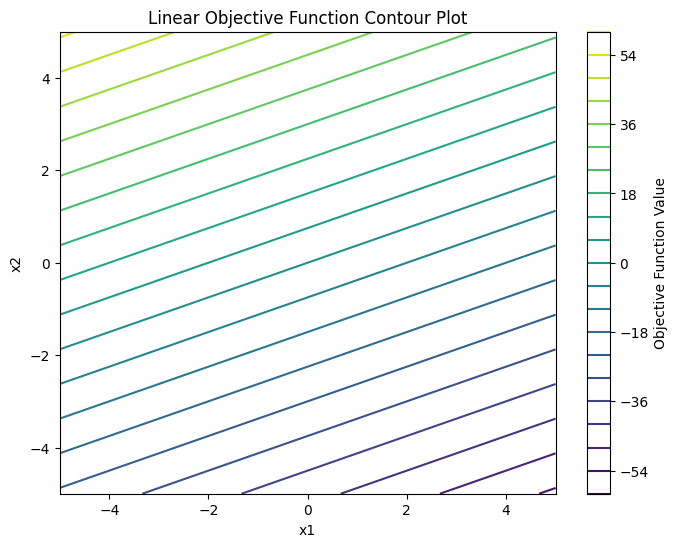

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function: f(x) = (1/sqrt(2)) * ((x1 + 3)^2 + (x2 - 8)^2)
def objective(x, v):
    return (1/np.sqrt(2)) * ((x[0] + 3)**2 + (x[1] - 8)**2)

# Generate the heatmap
def plot_objective_function(v):
    # Create a grid of x1 and x2 values
    x1 = np.linspace(-5, 5, 400)
    x2 = np.linspace(-5, 5, 400)
    X1, X2 = np.meshgrid(x1, x2)

    # Calculate the objective function values over the grid
    Z = np.zeros_like(X1)
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            x = np.array([X1[i, j], X2[i, j]])
            Z[i, j] = objective(x, v)

    # Plot the contour plot (heatmap)
    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
    plt.colorbar(cp, label='Objective Function Value')
    plt.title("Objective Function Heatmap")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# Given vector v = [-3, 8]
v = np.array([-3, 8])

# Plot the objective function
plot_objective_function(v)
# Plot the linear objective function
plot_linear_objective_function(v)

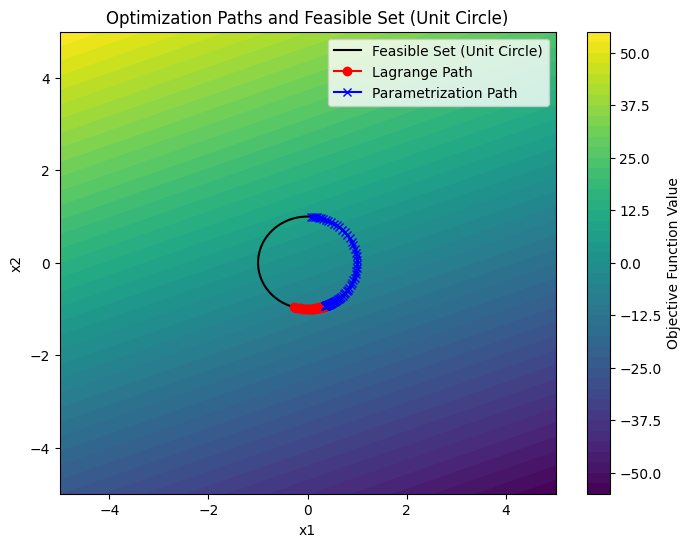

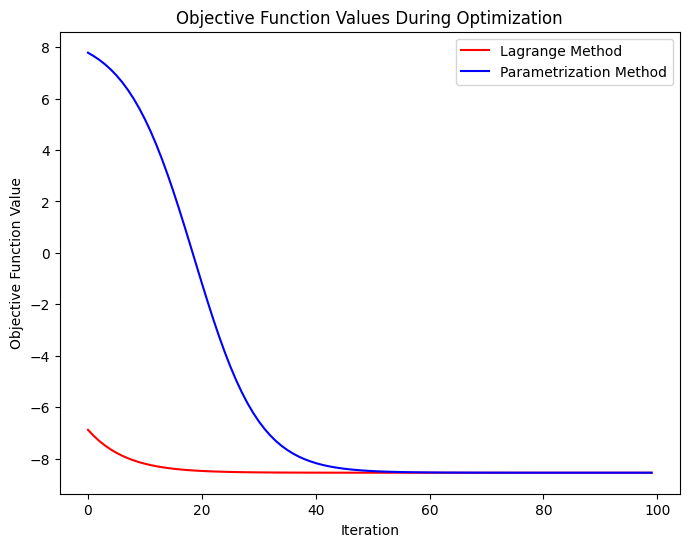

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Objective function: f(x) = v^T x
def objective(x, v):
    return np.dot(v, x)

# Lagrange multiplier gradient (Lagrange-dual method)
def lagrange_gradients(x, lambda_):
    grad_f1 = x[0] * lambda_ + 1 * (-3)  # Gradient w.r.t x1
    grad_f2 = x[1] * lambda_ + 1 * (8)  # Gradient w.r.t x2
    grad_lambda = x[0]**2 + x[1]**2 - 1  # Gradient w.r.t lambda (unit circle constraint)
    return np.array([grad_f1, grad_f2, grad_lambda])

# Gradient descent for the Lagrange method with constraint projection
def lagrange_method(v, lr=0.01, num_iterations=100):
    x = np.random.randn(2)  # Start from a random point
    lambda_ = 0.0  # Lagrange multiplier
    x_history = []  # To track the optimization path
    f_values = []   # To track the objective function values

    for _ in range(num_iterations):
        grads = lagrange_gradients(x, lambda_)
        x -= lr * grads[:2]  # Update x1, x2
        lambda_ -= lr * grads[2]  # Update lambda

        # Project x onto the unit circle (constraint enforcement)
        x = x / np.linalg.norm(x)  # Ensure x stays on the unit circle

        x_history.append(x.copy())
        f_values.append(objective(x, v))

    return np.array(x_history), f_values

# Parametrization method (optimization over theta)
def objective_param(theta, v):
    x1 = np.cos(theta)
    x2 = np.sin(theta)
    return np.dot(v, np.array([x1, x2]))  # f(x) = v^T x

# Gradient of the objective function w.r.t theta
def grad_objective_param(theta, v):
    x1 = np.cos(theta)
    x2 = np.sin(theta)
    grad_theta = (v[0] * (-np.sin(theta)) + v[1] * np.cos(theta))
    return grad_theta

# Gradient descent for parametrization method
def parametrization_method(v, lr=0.01, num_iterations=100):
    theta = np.random.randn()  # Start with a random angle
    theta_history = []  # To track the optimization path
    f_values = []  # To track the objective function values

    for _ in range(num_iterations):
        grad = grad_objective_param(theta, v)
        theta -= lr * grad  # Update theta
        theta_history.append(theta)
        f_values.append(objective_param(theta, v))

    return np.array(theta_history), np.array(f_values)

# Plot the heatmap of the linear objective function
def plot_heatmap(v):
    x1 = np.linspace(-5, 5, 400)
    x2 = np.linspace(-5, 5, 400)
    X1, X2 = np.meshgrid(x1, x2)

    Z = X1 * v[0] + X2 * v[1]  # f(x) = v^T x

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
    plt.colorbar(cp, label='Objective Function Value')
    plt.title("Linear Objective Function Heatmap")
    plt.xlabel("x1")
    plt.ylabel("x2")

# Plot the feasible set (unit circle)
def plot_feasible_set():
    theta = np.linspace(0, 2 * np.pi, 100)
    x1 = np.cos(theta)
    x2 = np.sin(theta)
    plt.plot(x1, x2, label="Feasible Set (Unit Circle)", color="black")

# Plot optimization paths and the feasible set
def plot_paths(v, lagrange_history, param_history, lagrange_f_values, param_f_values):
    # Plot the heatmap of the objective function
    plot_heatmap(v)

    # Plot the feasible set (unit circle)
    plot_feasible_set()

    # Plot the path for Lagrange Multiplier method
    lagrange_history = lagrange_history[:, 0], lagrange_history[:, 1]  # Take only x1, x2
    plt.plot(lagrange_history[0], lagrange_history[1], label="Lagrange Path", color="red", marker="o")

    # Plot the path for Parametrization method
    param_x1 = np.cos(param_history)
    param_x2 = np.sin(param_history)
    plt.plot(param_x1, param_x2, label="Parametrization Path", color="blue", marker="x")

    # Labels and legend
    plt.legend()
    plt.title("Optimization Paths and Feasible Set (Unit Circle)")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

    # Plot objective function values at each step
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(lagrange_f_values)), lagrange_f_values, label="Lagrange Method", color="red")
    plt.plot(range(len(param_f_values)), param_f_values, label="Parametrization Method", color="blue")
    plt.xlabel("Iteration")
    plt.ylabel("Objective Function Value")
    plt.title("Objective Function Values During Optimization")
    plt.legend()
    plt.show()

# Given vector v = [-3, 8]
v = np.array([-3, 8])

# Run both methods
lagrange_history, lagrange_f_values = lagrange_method(v, lr=0.01, num_iterations=100)
param_history, param_f_values = parametrization_method(v, lr=0.01, num_iterations=100)

# Plot the optimization paths and feasible set
plot_paths(v, lagrange_history, param_history, lagrange_f_values, param_f_values)


The Lagrange Multiplier Path (red) and Parametrization Path (blue) both should converge to a point on the unit circle that maximizes the objective function.
The feasible set is marked by the unit circle, which represents all points satisfying || x || = 1

The Lagrange-dual method is more complex because it involves both the decision variables x and the Lagrange multiplier. This introduces oscillations or fluctuations in the path and makes convergence slower, especially if the learning rate is not well-tuned. However, it is a more general approach and works for a variety of constrained optimization problems.


The parametrization method, by contrast, directly optimizes the angle on the unit circle, which makes it simpler and results in a smoother path. The parametrization method leverages the structure of the problem (the unit circle constraint) to converge faster and with fewer complications.